**Name:** SHUYUE JIA

**EID:** 56846018

# CS5489 - Tutorial 3
## Gender Classification from Face Images

In this tutorial you will train a classifier to predict whether a face image is male or female.

First we need to initialize Python.  Run the below cell.

In [2]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import os
import zipfile
import fnmatch
random.seed(100)


## 1. Loading Data and Pre-processing
We first need to load the images.  Download `photos-bw.zip` and put it in the same directory as this ipynb file.  **Do not unzip the file.** Then run the following cell to load the images.

In [3]:
imgdata = []
genders = []

# load the zip file
filename = 'photos-bw.zip'
zfile = zipfile.ZipFile(filename, 'r')

for name in zfile.namelist():
    # check file name matches
    if fnmatch.fnmatch(name, "photos-bw/*.png"):
        # print("loading", name)
        # open file in memory, and parse as an image
        myfile = zfile.open(name)
        img = matplotlib.image.imread(myfile)
        myfile.close()
        
        # append to data
        imgdata.append(img)
        genders.append( int(name[len("photos-bw/")] == 'm') )  # 0 is female, 1 is male
        
zfile.close()
imgsize = img.shape
print(imgsize)
print("DONE: loaded {} images".format(len(imgdata)))


(45, 40)
DONE: loaded 50 images


Each image is a 45x40 array of pixel values.  Run the below code to show an example:

(45, 40)


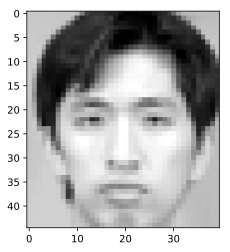

In [4]:
print(img.shape)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.show()


Run the below code to show all the images!

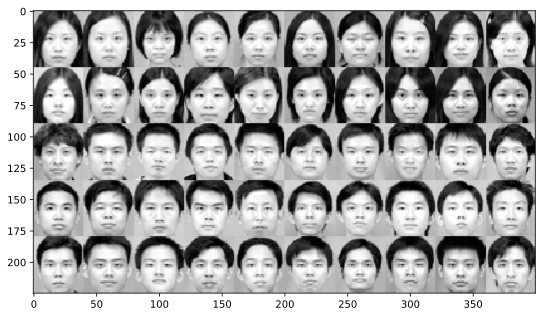

In [5]:
# function to make an image montage
def image_montage(X, imsize=None, maxw=10):
    """X can be a list of images, or a matrix of vectorized images.
      Specify imsize when X is a matrix."""
    tmp = []
    numimgs = len(X)
    
    # create a list of images (reshape if necessary)
    for i in range(0,numimgs):
        if imsize != None:
            tmp.append(X[i].reshape(imsize))
        else:
            tmp.append(X[i])
    
    # add blanks
    if (numimgs > maxw) and (mod(numimgs, maxw) > 0):
        leftover = maxw - mod(numimgs, maxw)
        meanimg = 0.5*(X[0].max()+X[0].min())
        for i in range(0,leftover):
            tmp.append(ones(tmp[0].shape)*meanimg)
    
    # make the montage
    tmp2 = []
    for i in range(0,len(tmp),maxw):
        tmp2.append( hstack(tmp[i:i+maxw]) )
    montimg = vstack(tmp2) 
    return montimg

plt.figure(figsize=(9,9))
plt.imshow(image_montage(imgdata), cmap='gray', interpolation='nearest')
plt.show()


Each image is a 2d array, but the classifier algorithms work on 1d vectors. Run the following code to convert all the images into 1d vectors by flattening.  The result should be a matrix where each row is a flattened image.

In [6]:
X = empty((50, prod(imgdata[0].shape))) # create empty array
for i,img in enumerate(imgdata):
    X[i,:] = ravel(img)           # for each image, turn it into a vector
Y = asarray(genders)  # convert list to numpy array

print(X.shape)
print(Y.shape)


(50, 1800)
(50,)


Next we will shift the pixel values so that gray is 0.0, black is -0.5 and white is 0.5.

In [7]:
print("Before: min={}, max={}".format(X.min(), X.max()))

X -= 0.5
print("After:  min={}, max={}".format(X.min(), X.max()))

Before: min=0.0, max=1.0
After:  min=-0.5, max=0.5


Finally, split the dataset into a training set and testing set. We select 80% for training and 20% for testing.

In [8]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = \
  model_selection.train_test_split(X, Y, 
  train_size=0.80, test_size=0.20, random_state=4487)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)


(40, 1800)
(10, 1800)
(40,)
(10,)


In [9]:
# compute the average image for later
avgX = mean(X, axis=0)
avgX2 = median(X, axis=0)

# 2. Logistic Regression
Train a logistic regression classifier.  Use cross-validation to select the best C parameter.

In [30]:
# learn logistic regression classifier using CV 
# Cs is an array of possible C values 
# cv is the number of folds 
# n_jobs=-1 means run in parallel with all cores 
print(logspace(-4, 0, 1000))
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4, 4, 20), cv=10, n_jobs=-1) 
logreg.fit(trainX, trainY)

# print("w =", logreg.coef_) 
# print("b =", logreg.intercept_)


[1.00000000e-04 1.00926219e-04 1.01861017e-04 1.02804473e-04
 1.03756668e-04 1.04717682e-04 1.05687597e-04 1.06666496e-04
 1.07654461e-04 1.08651577e-04 1.09657929e-04 1.10673602e-04
 1.11698682e-04 1.12733256e-04 1.13777413e-04 1.14831241e-04
 1.15894830e-04 1.16968270e-04 1.18051653e-04 1.19145070e-04
 1.20248614e-04 1.21362380e-04 1.22486461e-04 1.23620954e-04
 1.24765955e-04 1.25921561e-04 1.27087871e-04 1.28264983e-04
 1.29452998e-04 1.30652016e-04 1.31862140e-04 1.33083472e-04
 1.34316117e-04 1.35560179e-04 1.36815763e-04 1.38082977e-04
 1.39361927e-04 1.40652724e-04 1.41955477e-04 1.43270295e-04
 1.44597292e-04 1.45936580e-04 1.47288272e-04 1.48652484e-04
 1.50029332e-04 1.51418933e-04 1.52821404e-04 1.54236865e-04
 1.55665436e-04 1.57107239e-04 1.58562396e-04 1.60031031e-04
 1.61513269e-04 1.63009236e-04 1.64519059e-04 1.66042866e-04
 1.67580786e-04 1.69132952e-04 1.70699493e-04 1.72280545e-04
 1.73876240e-04 1.75486715e-04 1.77112106e-04 1.78752553e-04
 1.80408193e-04 1.820791

LogisticRegressionCV(Cs=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                     class_weight=None, cv=10, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Use the learned model to predict the genders for the training and testing data. What is the accuracy on the training set? What is the accuracy on the testing set?

training accuracy = 0.95
test accuracy = 0.8


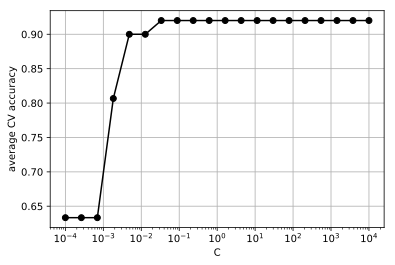

In [31]:
# Performance on the training set
train_pre = logreg.predict(trainX)
acc_train = metrics.accuracy_score(trainY, train_pre) 
print("training accuracy =", acc_train)

# Performance on the testing set
predY = logreg.predict(testX)
acc_test = metrics.accuracy_score(testY, predY) 
print("test accuracy =", acc_test)
# print("C =", logreg.C_)

# calculate the average score for each C
avgscores = mean(logreg.scores_[1], 0) 
plt.semilogx(logreg.Cs_, avgscores, 'ko-') 
plt.xlabel('C');
plt.ylabel('average CV accuracy'); 
plt.grid(True);


### Analyzing the classifier
Run the below code to show the hyperplane parameter $\mathbf{w}$ as an image.  

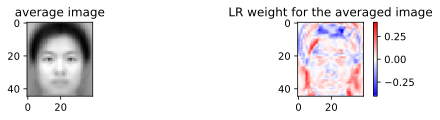

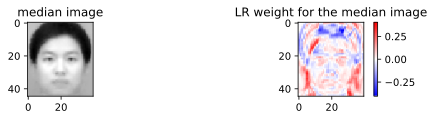

In [11]:
# logreg is the learned logistic regression model
wimg = logreg.coef_.reshape(imgsize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(2, 2, 1)
plt.title('average image')
plt.imshow(avgX.reshape(imgsize), cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight for the averaged image")

wimg = logreg.coef_.reshape(imgsize)
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(2, 2, 3)
plt.title('median image')
plt.imshow(avgX2.reshape(imgsize), cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight for the median image")
plt.show()


Recall that the classifier prediction is based on the sign of the function $f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}+b = \sum_{i=1}^P w_ix_i + b$.  Here each $x_i$ is a pixel in the face image, and $w_i$ is the corresponding weight.  Hence, the function is multiplying face image by the weight image, and then summing over all pixels.

In order for $f(\mathbf{x})$ to be positive, then the positive values of the weight image (red regions) should match the positive values in the face image (white pixels), and the negative values of the weight image (blue regions) should be matched with negative values in the face image (black pixels).

Hence, we can have the following interpretation:
<table>
<tr><th>Class</th><th>red regions (positive weights)</th><th>blue regions (negative weights)</th><th>white regions (weights near 0)</th></tr>
<tr><td>+1 class (male)</td><td>white pixels in face image</td><td>black pixels in face image</td><td>region not important</td></tr>
<tr><td>-1 class (female)</td><td>black pixels in face image</td><td>white pixels in face image</td><td>region not important</td></tr>
</table>
  
_Looking at the weight image, what parts of the face image is the classifier looking at to determine the gender?  Does it make sense?_

- The **overall boundary** of face especially the **edges** around the face:
    nose, eyes, mouth, face boundary, and etc.

- The smooth texture in the face does not make a difference.

Now let's look at the misclassified faces in the test set.  Run the below code to show the misclassifed and correctly classified faces.

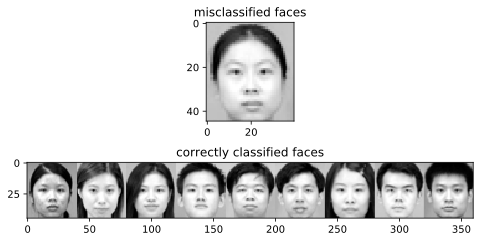

In [12]:
# predYtest are the class predictions on the test set.
predYtest = logreg.predict(testX)

# find misclassified test images
inds = where(predYtest != testY) # get indices of misclassified test images
badimgs = image_montage(testX[inds], imsize=imgsize)  # make a montage

# find correctly classified test images
inds = where(predYtest == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)
    
plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.imshow(badimgs, cmap='gray', interpolation='nearest')
plt.title('misclassified faces')
plt.subplot(2,1,2)
plt.imshow(goodimgs, cmap='gray', interpolation='nearest')
plt.title('correctly classified faces')
plt.show()


_Why did the classifier make incorrect predictions on the misclassified faces?_
- The overall boundary and surroundings are quite similar to those of the man.
    As a result, the model might recognize this face as a man's face mistakenly.


# 3. Support Vector Machine
Now train a support vector machine (SVM) on the same training and testing data.  Use cross-validation to select the best $C$ parameter.

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.012742749857031334}
0.9
SVC(C=0.012742749857031334, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


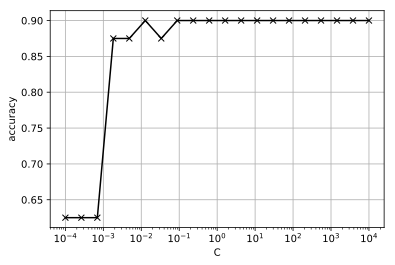

In [32]:
# setup the cross-validation object 
# pass the SVM object, parameter grid, and number of CV folds 
# set number of parallel jobs to -1 (use all cores) 
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='linear'), 
                                     {'C': logspace(-4, 4, 20)}, 
                                     cv=10, 
                                     n_jobs=-1, 
                                     verbose=True)

# run cross-validation (train for each split) 
svmcv.fit(trainX, trainY);

# make a plot 
allC = [p['C'] for p in svmcv.cv_results_['params']] 
allscores = svmcv.cv_results_['mean_test_score']

plt.figure() 
plt.semilogx(allC, allscores, 'kx-') 
plt.xlabel('C')
plt.ylabel('accuracy') 
plt.grid(True)

# view best results and best retrained estimator 
print(svmcv.best_params_) 
print(svmcv.best_score_) 
print(svmcv.best_estimator_)


Calculate the training and test accuracy for the SVM classifier.

In [14]:
train_pred = svmcv.predict(trainX)
train_acc = metrics.accuracy_score(trainY, train_pred) 
print("training accuracy =", train_acc)

test_pred = svmcv.predict(testX)
test_acc = metrics.accuracy_score(testY, test_pred) 
print("test accuracy =", test_acc)


training accuracy = 0.925
test accuracy = 0.8


Similar to before, plot an image of the hyperplane parameters $w$, and view the misclassified and correctly classified test images.

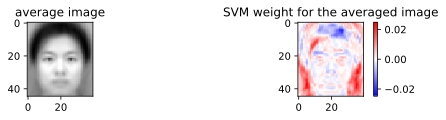

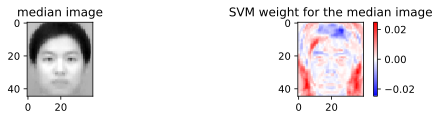

In [15]:
# svmcv is the learned SVM model
wimg = svmcv.best_estimator_.coef_.reshape(imgsize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(2, 2, 1)
plt.title('average image')
plt.imshow(avgX.reshape(imgsize), cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("SVM weight for the averaged image")

wimg = svmcv.best_estimator_.coef_.reshape(imgsize)
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(2, 2, 3)
plt.title('median image')
plt.imshow(avgX2.reshape(imgsize), cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("SVM weight for the median image")
plt.show()


_Are there any differences between the $w$ for logistic regressiona and the $w$ for SVM?  Is there any interpretation for the differences?_

- Observation: The LR model counts the overall boundary of the face region, whereas the outside background is mostly ignored. In contrast, the SVM model counts not only the face region and boundary, but also the background.
    
- Interpretation: For the LR model, since it is a linear model, the pixels that have a higher variation would be assigned a larger weight. That's also why the edges and boundary of the face are assigned a larger weight. In contrast, as for the SVM model, different from the LR model, it finds the largest margin between the "classification line" and support vectors (here is the pixels of one image). It means that the face and the background are all considered to find the largest margin. That's why the background region was assigned a larger weight.


# 4. Classifying cropped faces
It seems that the hair around the face and forehead are discriminative enough to perform gender classifixation. Now try to perform the same task but only focusing on the face image, and not the hair.

First, we define a mask over the face.

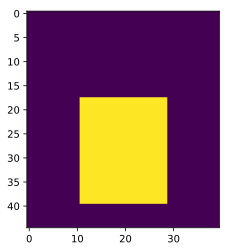

In [16]:
imgmask = full((img.shape), False)
# imgmask[17:41,8:32] = True
# masksize = (24,24)
imgmask[18:40,11:29] = True
masksize = (22, 18)
plt.imshow(imgmask)


Next we crop out the face image to create the new inputs.  The vectors are now 576-dim, and corresponding images are 24x24.

In [17]:
Xm = X[:,imgmask.ravel()]
Xm.shape


(50, 396)

Here are the cropped images.

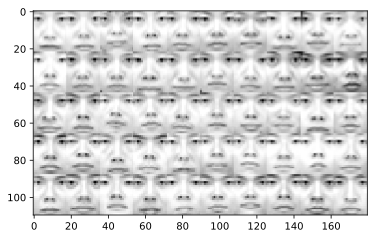

In [18]:
plt.imshow(image_montage(Xm, imsize=masksize), cmap='gray', interpolation='nearest')

Generate the same training/test split as before

In [19]:
# randomly split data into 80% train and 20% test set
trainXm, testXm, trainY, testY = \
  model_selection.train_test_split(Xm, Y, 
  train_size=0.80, test_size=0.20, random_state=4487)

print(trainXm.shape)
print(testXm.shape)


(40, 396)
(10, 396)


In [20]:
avgXm = avgX[imgmask.ravel()]

Now train logistic regression and SVM classifiers on the new cropped images.

In [21]:
# Logistic Regression Model
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-100, 10000, 100), cv=10, n_jobs=-1) 
logreg.fit(trainXm, trainY)


/Users/shuyuej/.local/lib/python3.5/site-packages/numpy/core/function_base.py:274: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=array([1.00000000e-100, 1.04761575e+002, 1.09749877e+104, 1.14975700e+206,
       1.20450354e+308,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
 

In [22]:
# SVM model
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='linear'), 
                                     {'C': logspace(-3, 3, 13)}, 
                                     cv=10, 
                                     n_jobs=-1, 
                                     verbose=True)

# run cross-validation (train for each split) 
svmcv.fit(trainXm, trainY)


Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    0.2s finished
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

Compute the train/test accuracies of the two classifiers.

In [23]:
# Performance on the training set
train_pre = logreg.predict(trainXm)
acc_train = metrics.accuracy_score(trainY, train_pre) 
print("training accuracy =", acc_train)

# Performance on the testing set
test_pre = logreg.predict(testXm)
acc_test = metrics.accuracy_score(testY, test_pre) 
print("test accuracy =", acc_test)


training accuracy = 1.0
test accuracy = 0.8


In [24]:
# Performance on the training set
train_pred = svmcv.predict(trainXm)
train_acc = metrics.accuracy_score(trainY, train_pred) 
print("training accuracy =", train_acc)

# Performance on the testing set
test_pre = svmcv.predict(testXm)
test_acc = metrics.accuracy_score(testY, test_pre) 
print("test accuracy =", test_acc)


training accuracy = 0.95
test accuracy = 0.7


Compare the classification performance? Which performs better and why?

- The performance of LR is better since it mostly considers the variations among pixels and boundary and edges would be important to train such a model. In contrast, as for the SVM model, without the background, which is different from the face pixels, the optimal margin might be hard to find.

Visualize the weights as an image and interpret what discriminative information each classifier is using.

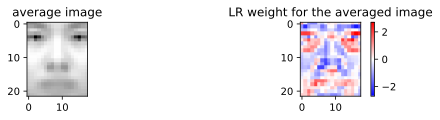

In [25]:
# logreg is the learned logistic regression model
wimg = logreg.coef_.reshape(masksize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(2, 2, 1)
plt.title('average image')
plt.imshow(avgXm.reshape(masksize), cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight for the averaged image")
plt.show()


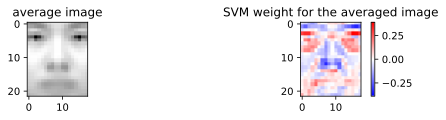

In [26]:
# svmcv is the learned SVM model
wimg = svmcv.best_estimator_.coef_.reshape(masksize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(2, 2, 1)
plt.title('average image')
plt.imshow(avgXm.reshape(masksize), cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("SVM weight for the averaged image")
plt.show()

- For the LR model, it mostly considers the variations among pixels, and the boundary and edges would be important to train such a model. As a result, the edges and boundary are assigned with discriminative weights. In contrast, as for the SVM model, without the background, which is different from the face pixels, the optimal margin might be hard to find and the weights are not so discriminative compared with those of the LR model.